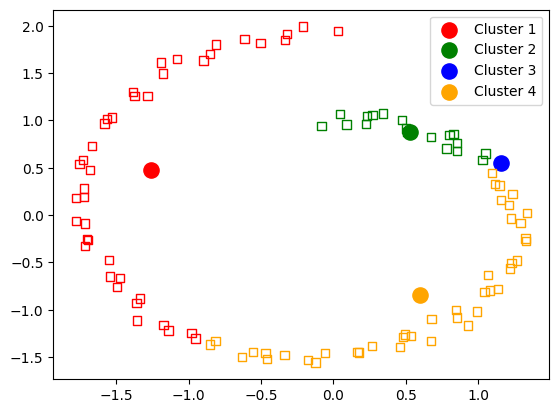

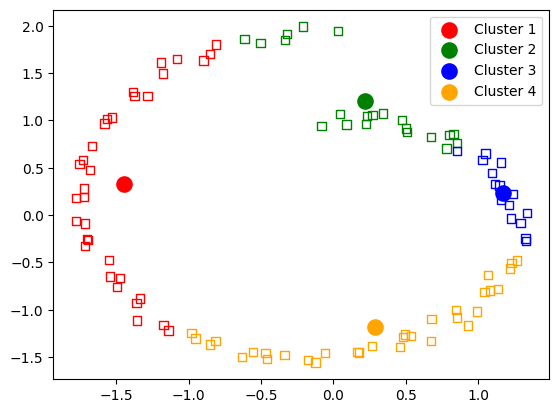

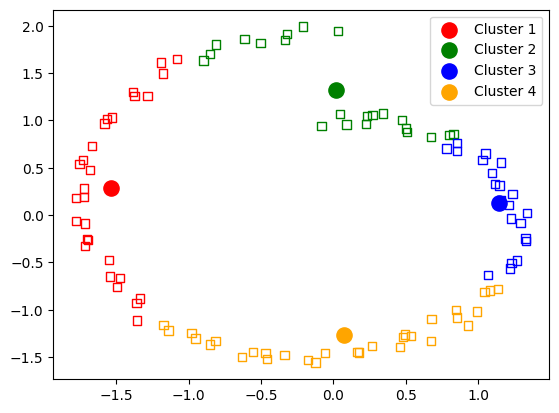

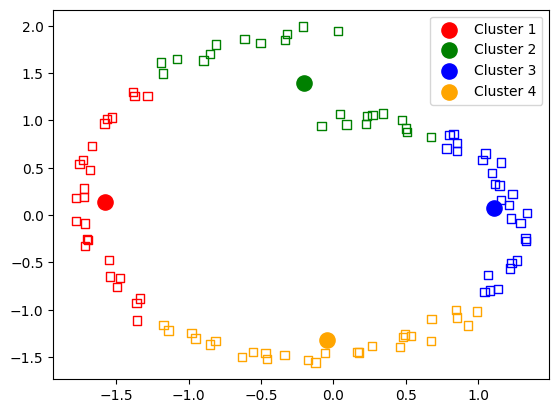

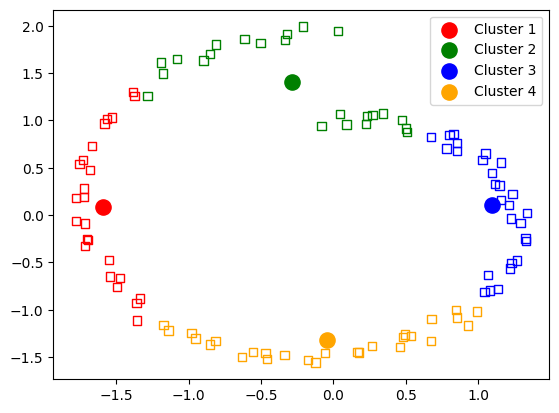

In [3]:
import pandas as pd
import math
import matplotlib.pyplot as plt
cmap = ['red', 'green', 'blue', 'orange', 'pink', 'magenta', 'green']

def k_mean(samples, sample_names, kl, i):
    df_names = pd.read_csv(sample_names, sep="\t", header=None)
    df = pd.read_csv(samples, delim_whitespace=True, header=None, names=df_names[0])

    # Randomowy wybór początkowych środków klastrów
    random_centers = df.sample(kl).values.tolist()
    distances = []
    min_distances = []

    for iteration in range(i):
        for s in df.values.tolist():
            for v in random_centers:
                # Odległość między próbkami a centrami
                distances.append(math.dist(s, v))

            # Przypisanie próbki do klastra o najmniejszej odległości
            min_distances.append(distances.index(min(distances)))
            distances.clear()

        for j in range(kl):
            x_gr = []
            # Dla każdego klastra wybieram próbki przypisane do tego klastra
            for idx, z in enumerate(min_distances):
                if z == j:
                    x_gr.append(df.values[idx].tolist())
            # Nowe współrzędne środka klastra
            if len(x_gr) == 0:
                continue

            x_new = 0
            y_new = 0
            for point in x_gr:
                x_new += point[0]
                y_new += point[1]
                plt.scatter(point[0], point[1], marker='s', facecolors='none', edgecolors=cmap[j])

            random_centers[j] = [x_new / len(x_gr), y_new / len(x_gr)]
            plt.scatter(random_centers[j][0], random_centers[j][1], marker='o', s=120, color=cmap[j], label=f'Cluster {j + 1}')

        min_distances.clear()
        plt.legend()
        plt.show()

k_mean("spirala.txt", "spirala-type.txt", 4, 5)
